In [45]:
import torch
import torchvision
import numpy as np
from torch import optim
from torchvision import transforms
import torch.nn.functional as F

In [2]:
%matplotlib inline

In [3]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3015,))])

In [4]:
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)

In [5]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=32, shuffle=True, num_workers=8)

In [6]:
testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=32, shuffle=True, num_workers=8)

In [20]:
dataiter = iter(trainloader)

In [21]:
images, label = dataiter.next()

In [23]:
images.shape

torch.Size([32, 1, 28, 28])

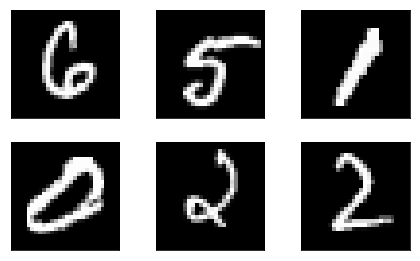

In [163]:
import matplotlib.pyplot as plt

fig = plt.figure()
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.tight_layout()
  plt.imshow(images[i+10][0], cmap='gray', interpolation='none')
  plt.xticks([])
  plt.yticks([])

In [158]:
class MNISTCNN(torch.nn.Module):
    def __init__(self, *agrs, **kwargs):
        super(MNISTCNN, self).__init__(*agrs, **kwargs)
        self.conv1 = torch.nn.Conv2d(1,20,5)
        self.conv2 = torch.nn.Conv2d(20,40,5)
        self.lin1 = torch.nn.Linear(40*4*4, 1280)
        self.lin2 = torch.nn.Linear(1280, 160)
        self.lin3 = torch.nn.Linear(160, 10)
        
    def forward(self, x):
        x = F.max_pool2d(F.relu(self.conv1(x)), 2)
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, 40*4*4)
        x = F.relu(self.lin1(x))
        x = F.relu(self.lin2(x))
        x = self.lin3(x)
        return x

In [171]:
network = MNISTCNN()
optimizer = optim.SGD(network.parameters(), lr=0.001*6, momentum=0.9)
criterion = torch.nn.CrossEntropyLoss()

In [172]:
def test():
    correct = 0
    total = 0
    network.eval()
    running_loss = 0.0
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            outputs = network(images)
            loss = criterion(outputs, labels)
            running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
#     print('Accuracy of the network on the %d test images: %d %%' % (total, 100 * correct / total))
    return running_loss/len(testloader)

In [173]:
def train_and_test():
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        network.train()
        images, label = data
        optimizer.zero_grad()
        output = network(images)
        x = output
        loss = criterion(output, label)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i % 500 == 499:    # print every 500 mini-batches
            test_loss = test()
            print('[%5d] training_loss:%.3f  test_loss:%.3f'%
                  (i + 1, running_loss / 500, test_loss))
            running_loss = 0.0 

In [174]:
for x in range(3):
    train_and_test()

[  500] training_loss:0.458  test_loss:0.117
[ 1000] training_loss:0.101  test_loss:0.059
[ 1500] training_loss:0.075  test_loss:0.052
[  500] training_loss:0.052  test_loss:0.045
[ 1000] training_loss:0.043  test_loss:0.039
[ 1500] training_loss:0.042  test_loss:0.033
[  500] training_loss:0.030  test_loss:0.037
[ 1000] training_loss:0.029  test_loss:0.041
[ 1500] training_loss:0.028  test_loss:0.031
